In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [71]:
def prepare_data():
    X = datasets.load_digits().data
    Y = datasets.load_digits().target
    X = X[:1500,:]
    Y = Y[:1500]
    return (X,Y)

def getTestData():
    X = datasets.load_digits().data
    Y = datasets.load_digits().target
    X = X[1500:,:]
    Y = Y[1500:]
    return (X,Y)
    

In [72]:


def sigmoid(x):
    #sigmoidal activation
    a = 1.0 / (1.0 + np.exp(-1.0*x))
    return a

def sigmoidGradient(x):
    return np.multiply(sigmoid(x),1.0-sigmoid(x))

def calc_cost(w,in_size,h_size,o_size,x,y,lam):
    # calculate cost
    theta1 = np.reshape(w[0:(in_size+1)*h_size],(h_size,in_size+1))
    theta2 = np.reshape(w[(in_size+1)*h_size:],(o_size,h_size+1))
    m = x.shape[0]
    
    cost = 0.0 
    
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis = 1)
    z2 = np.dot(x,theta1.T)
    a2 = np.concatenate((np.ones((z2.shape[0],1)),sigmoid(z2)),axis = 1)
    z3 = np.dot(a2,theta2.T)
    a3 = sigmoid(z3)
    h_theta = a3
    
    
    my_y = np.zeros((y.shape[0],o_size))
    for i in range(0,y.shape[0]):
        my_y[i,y[i]] = 1.0
        
    for i in range(0,o_size):
        part1 = np.sum(np.multiply(my_y[:,i],np.log(h_theta[:,i])))
        part2 = np.sum(np.multiply((1.0-my_y[:,i]),np.log(1.0-h_theta[:,i])))
        cost+=part1+part2
    cost = -1.0 * cost/m
    reg =  lam*(np.sum(np.square(theta1[:,1:].flatten()))+np.sum(np.square(theta2[:,1:].flatten())))/(2.0*m)
    cost = cost+reg
    
    #calculate gradient
    
    a1 = x
    z2 = np.dot(a1,theta1.T)
    a2 = np.concatenate((np.ones((z2.shape[0],1)),sigmoid(z2)),axis = 1)
    z3 = np.dot(a2,theta2.T)
    a3 = sigmoid(z3)
    
    Bdelta1= np.zeros(theta1.shape)
    Bdelta2= np.zeros(theta2.shape)
    grad1= np.zeros(theta1.shape)
    grad2= np.zeros(theta2.shape)
    
    delta3 = a3-my_y
    delta2 = np.multiply(np.dot(delta3,theta2[:,1:]),sigmoidGradient(z2))
    
    Bdelta1 = np.dot(delta2.T,a1)
    Bdelta2 = np.dot(delta3.T,a2)
    
    grad1[:,0] = Bdelta1[:,0]
    grad1[:,1:] = (Bdelta1[:,1:] + lam*theta1[:,1:])/m
    grad2[:,0] = Bdelta2[:,0]
    grad2[:,1:] = (Bdelta2[:,1:] + lam*theta2[:,1:])/m
    
    grads = np.concatenate((grad1.flatten(),grad2.flatten()))
    return (grads,cost)

def classify(w,in_size,h_size,o_size,x):
    theta1 = np.reshape(w[0:(in_size+1)*h_size],(h_size,in_size+1))
    theta2 = np.reshape(w[(in_size+1)*h_size:],(o_size,h_size+1))
    
    x = np.concatenate((np.ones((x.shape[0],1)),x),axis = 1)
    z2 = np.dot(x,theta1.T)
    a2 = np.concatenate((np.ones((z2.shape[0],1)),sigmoid(z2)),axis = 1)
    z3 = np.dot(a2,theta2.T)
    a3 = sigmoid(z3)
    h_theta = a3
    return h_theta

def count_positive(x):
    return np.count_nonzero(x)

def train(w,x,y,n,h_size,o_size,alpha,lam):
    
    i_size = x.shape[1]
    h_size = h_size
    o_size = o_size
    
    costs = np.empty(n)
    for i in range(0,n):
        grads, costs[i] = calc_cost(w,i_size,h_size,o_size,x,y,lam)
        w = w - alpha*grads
    
    y_axis = np.arange(n)
    plt.plot(y_axis,costs)
    plt.show()
    print(w,costs[n-1])
    
    return (w,costs[n-1])

def test(w,i_size,h_size,o_size):
    X,Y = getTestData()
    data = np.array(X[0])
    result = classify(w,i_size,h_size,o_size,X)
    pos = 0
    total = result.shape[0]
    for i in range(0,result.shape[0]):
        if np.argmax(result[i]) == Y[i]:
            print(Y[i]," with ",np.max(result[i]))
            pos+=1
    per = (pos/total) * 100
    print("result: ",per)

[[  5.  13.   9. ...,  10.   0.   0.]
 [  0.  12.  13. ...,  16.  10.   0.]
 [  0.   4.  15. ...,  11.  16.   9.]
 ..., 
 [  0.  14.   4. ...,  16.   9.   0.]
 [  9.  15.  13. ...,  16.   9.   1.]
 [ 16.  13.   1. ...,  10.   8.   6.]]
[ 0.03694108  0.09441904  0.07602792 ...,  0.0377117   0.06099772
  0.10802719]


/home/ashish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


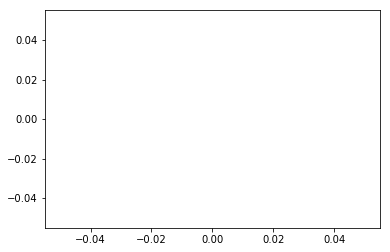

[ nan  nan  nan ...,  nan  nan  nan] nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
0  with  nan
result:  9.090909090909092


In [73]:
X,Y = prepare_data()
i_size = X.shape[1]
h_size = 25
o_size = 10
n = 100
alpha = 0.01
lam = 1.0


Theta1 = np.random.uniform(0,0.12,h_size*(i_size+1))
Theta2 = np.random.uniform(0,0.12,o_size*(h_size+1))
print (Theta1)

W = np.concatenate((Theta1,Theta2))
W,cost = train(W,X,Y,n,h_size,o_size,alpha,lam)
test(W,i_size,h_size,o_size)